In [1]:
import numpy as np
ratings = np.loadtxt('data/data.txt')
movies = np.loadtxt('data/movies.txt', encoding = 'latin-1', dtype = str, delimiter = '\t')
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)
len(Y_train)
from prob2utils import train_model
from prob2utils import get_err
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# deduce M, N and set parameters for model
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
K = 20
reg = 0
eta = 0.005

In [3]:
# run model using set 5 implementation
U, V, err = train_model(M, N, K, eta, reg, Y_train)

initial loss: 6.932495058932083
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [4]:
print('Training Error:')
get_err(U, V, Y_train)

Training Error:


0.17127216271998338

In [5]:
print('Testing Error:')
get_err(U, V, Y_test)

Testing Error:


0.595645964143978

In [6]:
# do SVD and find U tilde and V tilde

A, s, vh = np.linalg.svd(V.transpose(), full_matrices=False)

A_slim = A[:,:2]
A_slim.transpose().shape

U_tilde = (A_slim.transpose()).dot(U.transpose())
V_tilde = (A_slim.transpose()).dot(V.transpose())

In [7]:
U_tilde.shape, V_tilde.shape

((2, 943), (2, 1682))

In [8]:
# center to 0 and unit variance
for i in range(len(U_tilde)):
    V_tilde[i] -= np.mean(V_tilde[i])
    U_tilde[i] -= np.mean(U_tilde[i])

    V_tilde[i] /= np.std(V_tilde[i])
    U_tilde[i] /= np.std(U_tilde[i])

In [9]:
# Save movie names in a convenient format
movie_names = movies[:, 1]

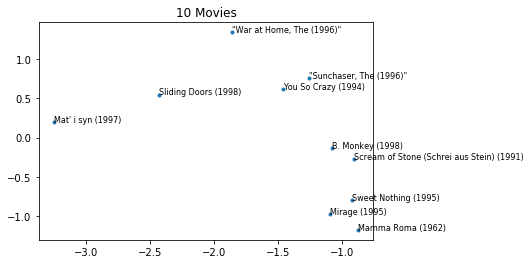

In [10]:
#Index list of points to plot
idx_list = [x for x in range(1672, 1682)]


#Getting x,y of these points
position_list = V_tilde[:,idx_list]
#Creating list of movie names
name_list = movie_names[idx_list]

#Plotting points
plt.plot(position_list[0], position_list[1], '.')
plt.title('10 Movies')
#Overlaying names of movies on plot
for i, txt in enumerate(name_list):
    plt.annotate(txt, (position_list[0, i], position_list[1, i]),fontsize = 8)
plt.savefig('figures/advanced_a', dpi = 400)

Star Wars (1977)
Contact (1997)
Fargo (1996)
Return of the Jedi (1983)
Liar Liar (1997)
"English Patient, The (1996)"
Scream (1996)
Toy Story (1995)
Air Force One (1997)
Independence Day (ID4) (1996)


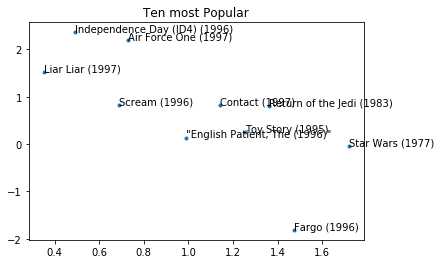

In [11]:
# count frequency of rating
movies_counts = np.zeros(len(ratings))
for rating in ratings:
    i = int(rating[1] - 1)
    movies_counts[i] += 1

# take the ten most frequently rated movies
max_indexes = []
for j in range(10):
    i = np.argmax(movies_counts)
    max_indexes.append([i, movies_counts[i]])
    movies_counts[i] = 0

inds = np.array(max_indexes).astype(int)[:,0]


#Index list of points to plot
idx_list = inds


#Getting x,y of these points
position_list = V_tilde[:,idx_list]
#Creating list of movie names
name_list = movie_names[idx_list]

#Plotting points
plt.plot(position_list[0], position_list[1], '.')
plt.title('Ten most Popular')
#Overlaying names of movies on plot
for i, txt in enumerate(name_list):
    print(txt)
    plt.annotate(txt, (position_list[0, i], position_list[1, i]))
    
plt.savefig('figures/advanced_b', dpi = 400)

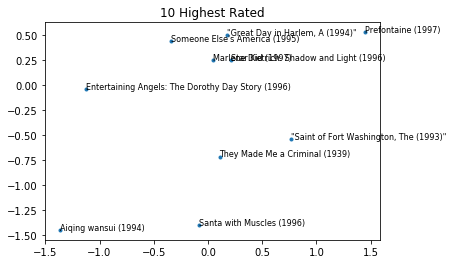

In [12]:
movies_counts = np.zeros(len(ratings))
for rating in ratings:
    i = int(rating[1] - 1)
    movies_counts[i] += 1

# get average ratings
movies_ratings = np.zeros(len(ratings))
for rating in ratings:
    i = int(rating[1] - 1)
    movies_ratings[i] += rating[2]
    
for i in range(len(movies_ratings)):
    if movies_counts[i] != 0:
        movies_ratings[i] /= float(movies_counts[i])

# take top 10
max_indexes = []
for j in range(10):
    i = np.argmax(movies_ratings)
    max_indexes.append([i, movies_ratings[i], int(movies_counts[i])])
    movies_ratings[i] = 0

# add movie title to tuple for convenience
for pt in max_indexes:
    i = pt[0]
    pt.append(movies[i][1])
    pt[1] = int(pt[1])
    
    
inds = np.array(max_indexes)[:,0]

#Index list of points to plot
idx_list = inds.astype(int)


#Getting x,y of these points
position_list = V_tilde[:,idx_list]
#Creating list of movie names
name_list = movie_names[idx_list]

#Plotting points
plt.plot(position_list[0], position_list[1], '.')
plt.title('10 Highest Rated')
#Overlaying names of movies on plot
for i, txt in enumerate(name_list):
    plt.annotate(txt, (position_list[0, i], position_list[1, i]), fontsize = 8)
plt.savefig('figures/advanced_c', dpi = 400)

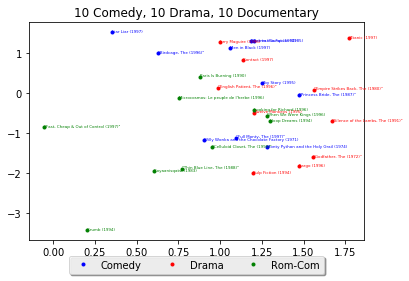

In [25]:
movies_counts = np.zeros(len(ratings))
for rating in ratings:
    i = int(rating[1] - 1)
    movies_counts[i] += 1
    
max_indexes = []
for j in range(len(movies)):
    i = np.argmax(movies_counts)
    max_indexes.append([i, movies_counts[i]])
    movies_counts[i] = 0
    
    
max_comedies = []
for pt in max_indexes:
    is_comedy = int(movies[pt[0]][7])
    if is_comedy == 1:
        max_comedies.append(pt)
    
    if len(max_comedies) == 10:
        break
        
max_dramas = []
for pt in max_indexes:
    is_drama = int(movies[pt[0]][10])
    if is_drama == 1:
        max_dramas.append(pt)
    
    if len(max_dramas) == 10:
        break
        
max_docs = []
for pt in max_indexes:
    is_doc = int(movies[pt[0]][9])
    if is_doc == 1:
        max_docs.append(pt)
    
    if len(max_docs) == 10:
        break
        
inds = list(np.array(max_comedies)[:,0].astype(int)) + list(np.array(max_dramas)[:,0].astype(int)) + list(np.array(max_docs)[:,0].astype(int))

#Index list of points to plot
idx_list = inds
comedy_inds = list(np.array(max_comedies)[:,0].astype(int))
drama_inds = list(np.array(max_dramas)[:,0].astype(int))
doc_inds = list(np.array(max_docs)[:,0].astype(int))

#Making a list of movie names
comedy_names = movie_names[comedy_inds]
drama_names = movie_names[drama_inds]
doc_names = movie_names[doc_inds]

#Getting x,y of these points
position_list_com = V_tilde[:,comedy_inds]
position_list_dram = V_tilde[:,drama_inds]
position_list_doc = V_tilde[:,doc_inds]



#Creating list of movie names
#name_list = movie_names[idx_list]

#Plotting points
plt.plot(position_list_com[0], position_list_com[1], '.', color = 'blue', label = 'Comedy')
plt.plot(position_list_dram[0], position_list_dram[1], '.', color = 'red', label = 'Drama')
plt.plot(position_list_doc[0], position_list_doc[1], '.', color = 'green', label = 'Rom-Com')




#Overlaying names of movies on plot
for i, txt in enumerate(comedy_names[:]):
    plt.annotate(txt, (position_list_com[0, i], position_list_com[1, i]), fontsize = 4, color= "blue")

for i, txt in enumerate(drama_names[:]):
    plt.annotate(txt, (position_list_dram[0, i], position_list_dram[1, i]), fontsize = 4, color= "red")
    
for i, txt in enumerate(doc_names[:]):
    plt.annotate(txt, (position_list_doc[0, i], position_list_doc[1, i]), fontsize = 4, color= "green")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)
plt.title('10 Comedy, 10 Drama, 10 Documentary')
plt.savefig('figures/advanced_d.png', dpi = 800)
    

In [14]:
rom, com, rom_com = [], [], []
for movie in movies:
    if int(movie[7]) == 1 and int(movie[16]) == 1:
        rom_com.append(int(movie[0]) - 1)
    elif int(movie[7]) == 1:
        com.append(int(movie[0]) - 1)
    elif int(movie[16]) == 1:
        rom.append(int(movie[0]) - 1)

rom = np.array(rom)
com = np.array(com)
rom_com = np.array(rom_com)

In [15]:
len(rom)

150

In [16]:
len(com)

408

In [17]:
len(rom_com)

97

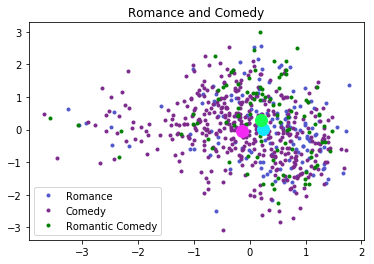

In [18]:
#Getting x,y of these points
position_list_rom = V_tilde[:,rom]
position_list_com = V_tilde[:,com]
position_list_rom_com = V_tilde[:,rom_com]

rom_av = np.mean(position_list_rom, axis = 1)
com_av = np.mean(position_list_com, axis = 1)
rom_com_av = np.mean(position_list_rom_com, axis = 1)


#Creating list of movie names
#name_list = movie_names[idx_list]

#Plotting points
plt.plot(position_list_rom[0], position_list_rom[1], '.', color = '#5157cc', label = 'Romance')
plt.plot(position_list_com[0], position_list_com[1], '.', color = '#7d2a8c', label = 'Comedy')
plt.plot(position_list_rom_com[0], position_list_rom_com[1], '.', color = 'green', label = 'Romantic Comedy')
plt.plot(rom_av[0], rom_av[1], 'o', color ='#16e7ff', ms = 12)
plt.plot(com_av[0], com_av[1], 'o', color = '#f429f4', ms = 12)
plt.plot(rom_com_av[0], rom_com_av[1], 'o', color = '#16ff54', ms = 12)
plt.legend()
plt.title('Romance and Comedy')
plt.savefig('figures/rom_vs_com.png', dpi = 400)

